<a href="https://colab.research.google.com/github/kheit9527/2025_TCFST_Python_ML/blob/main/250702_Python_ML_Class02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
資料準備好, 越齊全越好
age age in years
sex
bmi body mass index
bp average blood pressure
s1 tc, total serum cholesterol
s2 ldl, low-density lipoproteins
s3 hdl, high-density lipoproteins
s4 tch, total cholesterol / HDL
s5 ltg, possibly log of serum triglycerides level
s6 glu, blood sugar level
```

```

```



In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(scaled = False)

df = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
df["y"] = diabetes["target"]
df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [ ]:
load_diabetes(scaled = False)

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
        [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
        [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
        ...,
        [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
        [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
        [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(["y"], axis = 1)
y = df["y"]

# 90%x / 10%x, 90%y / 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 's5 <= 4.6\nsquared_error = 5911.672\nsamples = 397\nvalue = 152.98'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3268.774\nsamples = 197\nvalue = 110.563'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 2075.739\nsamples = 153\nvalue = 96.242'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4224.004\nsamples = 44\nvalue = 160.364'),
 Text(0.75, 0.5, 'bmi <= 31.55\nsquared_error = 4997.182\nsamples = 200\nvalue = 194.76'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4228.359\nsamples = 153\nvalue = 177.771'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3501.89\nsamples = 47\nvalue = 250.064')]

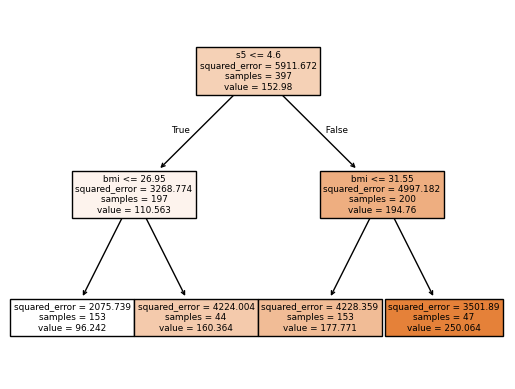

In [ ]:
from sklearn.tree import plot_tree
plot_tree(reg,
          feature_names = diabetes["feature_names"],
          filled = True)

```
東西越聚集，猜錯機率越低(-1 / 0<平均值> / 1)
東西越分散，猜錯機率越高(-10 / 0<平均值> / 10)
回歸的Gini係數: MSE(均方誤差)
MSE -> 每個點和平均的平均距離
```

MSE: $ \frac{1}{h} Σ (y_i - \mu) ^2 $

```
metrics特點: 一致性
```

In [ ]:
pre = reg.predict(x_test)
print(pre)

[ 96.24183007 177.77124183  96.24183007 177.77124183 177.77124183
 160.36363636  96.24183007  96.24183007  96.24183007  96.24183007
  96.24183007  96.24183007 177.77124183 177.77124183  96.24183007
 177.77124183 250.06382979  96.24183007 177.77124183 177.77124183
  96.24183007  96.24183007 177.77124183 177.77124183 177.77124183
  96.24183007  96.24183007 177.77124183 160.36363636 177.77124183
  96.24183007 177.77124183 177.77124183 250.06382979  96.24183007
  96.24183007 177.77124183  96.24183007 177.77124183 177.77124183
 177.77124183 177.77124183 177.77124183 160.36363636 177.77124183]


```
大型語言模型: 全部都記得(過擬合?)
```



$ pre_i $: 預測值  $ y_i $: 正確值

MSE: $ \frac{1}{h} Σ (pre_i - y_i) ^2 $

RMSE: $ \sqrt{\frac{1}{h} Σ (pre_i - y_i) ^2} $

MAE: $ \frac{1}{h} Σ |pre_i - y_i| $
```
RMSE、MSE: 會把忽大忽小的情況的誤差放得很大，就會知道哪種猜測比較不好(有極端值會很明顯)
上述統計參數: 日常生活溝通很直覺好用, 評估模型好壞不好用(因為需要一致的標準，看場合的好壞)

```



回歸的metrics: 習慣用 $ r^2 $ score

(因為 $ r^2 $ score 是一個一致的度量)

認真猜的誤差:
a = $ \frac{1}{h} Σ (pre_i - y_i) ^2 $ (資料點/正確值)


瞎猜的誤差:
b = $ \frac{1}{h} Σ (μ - y_i) ^2 $ (平均值/正確值)

a/b? -> 0(好)~1(爛)之間, 0.5以上就不錯
